In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import re

In [2]:
reviews_train = []
for line in open('./movie_data/full_train.txt', 'r',encoding="utf-8"):
    
    reviews_train.append(line.strip())
    
reviews_test = []
for line in open('./movie_data/full_test.txt', 'r',encoding="utf-8"):
    
    reviews_test.append(line.strip())

In [3]:
reviews_train[5]

"This isn't the comedic Robin Williams, nor is it the quirky/insane Robin Williams of recent thriller fame. This is a hybrid of the classic drama without over-dramatization, mixed with Robin's new love of the thriller. But this isn't a thriller, per se. This is more a mystery/suspense vehicle through which Williams attempts to locate a sick boy and his keeper.<br /><br />Also starring Sandra Oh and Rory Culkin, this Suspense Drama plays pretty much like a news report, until William's character gets close to achieving his goal.<br /><br />I must say that I was highly entertained, though this movie fails to teach, guide, inspect, or amuse. It felt more like I was watching a guy (Williams), as he was actually performing the actions, from a third person perspective. In other words, it felt real, and I was able to subscribe to the premise of the story.<br /><br />All in all, it's worth a watch, though it's definitely not Friday/Saturday night fare.<br /><br />It rates a 7.7/10 from...<br />

In [4]:
# Data Clean and Preprocess
from nltk.corpus import stopwords

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

# "sub" 替換str
def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    return reviews

# Remove Stop Words
english_stop_words = stopwords.words('english')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in english_stop_words])
        )
    return removed_stop_words

# 去除字尾Lemmatization
def get_lemmatized_text(corpus):
    from nltk.stem import WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in review.split()]) for review in corpus]

reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)

no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_test = remove_stop_words(reviews_test_clean)

all_clean_train = get_lemmatized_text(no_stop_words_train)
all_clean_test = get_lemmatized_text(no_stop_words_test)

In [5]:
all_clean_train[5]

'isnt comedic robin williams quirky insane robin williams recent thriller fame hybrid classic drama without dramatization mixed robin new love thriller isnt thriller per se mystery suspense vehicle williams attempt locate sick boy keeper also starring sandra oh rory culkin suspense drama play pretty much like news report williams character get close achieving goal must say highly entertained though movie fails teach guide inspect amuse felt like watching guy williams actually performing action third person perspective word felt real able subscribe premise story worth watch though definitely friday saturday night fare rate fiend'

In [6]:
'''
CountVectorizer會計算單字出現在文件的次數, 屬於常見的特徵數值計算類，是一個文字特徵提取方法。對於每一個訓練文字，它只考慮每種詞彙在該訓練文字中出現的頻率, 
並將文字中的詞語轉換為詞頻矩陣，它通過fit_transform函式計算各個詞語出現的次數
'''

'\nCountVectorizer會計算單字出現在文件的次數，CountVectorize\nCountVectorizer是屬於常見的特徵數值計算類，是一個文字特徵提取方法。對於每一個訓練文字，它只考慮每種詞彙在該訓練文字中出現的頻率。\nCountVectorizer會將文字中的詞語轉換為詞頻矩陣，它通過fit_transform函式計算各個詞語出現的次數\n'

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# 建立詞袋資料結構
stop_words = ['in', 'of', 'at', 'a', 'the']
cv = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words=stop_words)
# CountVectorizer是通過fit_transform函式將文字中的詞語轉換為詞頻矩陣
cv.fit(all_clean_train)
X = cv.transform(all_clean_train)
X_test = cv.transform(all_clean_test)

target = [1 if i < 12500 else 0 for i in range(25000)]

X_train, X_val, y_train, y_val = train_test_split(
    X, target, train_size = 0.75
)

In [8]:
# for c in [0.01, 0.05, 0.25, 0.5, 1]:
#     lr = LogisticRegression(C=c)
#     lr.fit(X_train, y_train)
#     print ("Accuracy for C=%s: %s" 
#            % (c, accuracy_score(y_val, lr.predict(X_val))))

In [9]:
'''
Logistic Regression
(1) They’re easy to interpret
(2) linear models tend to perform well on sparse datasets like this one
(3) they learn very fast compared to other algorithms.
'''

'\nLogistic Regression\n(1) They’re easy to interpret\n(2) linear models tend to perform well on sparse datasets like this one\n(3) they learn very fast compared to other algorithms.\n'

LogisticRegression(C=0.01)
Train Accuracy: 0.87584


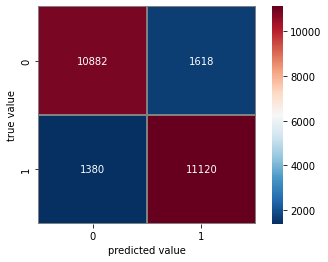

Final Accuracy: 0.88008
report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88     12500
           1       0.87      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [10]:
c001_model = LogisticRegression(C=0.01)

c001_model.fit(X_train, y_train)
print("LogisticRegression(C=0.01)")
print ("Train Accuracy:", accuracy_score(y_val, c001_model.predict(X_val)))

c001_model.fit(X, target)
mat = confusion_matrix(target, c001_model.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("Final Accuracy: %s" 
       % accuracy_score(target, c001_model.predict(X_test)))
print("report:\n", classification_report(target, c001_model.predict(X_test)))

LogisticRegression(C=0.05)
Train Accuracy: 0.8824


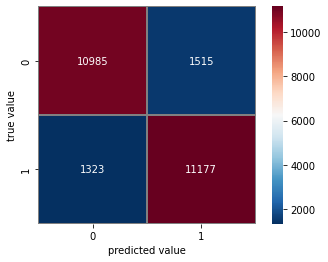

Final Accuracy: 0.88648
report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [11]:
c005_model = LogisticRegression(C=0.05)

c005_model.fit(X_train, y_train)
print("LogisticRegression(C=0.05)")
print ("Train Accuracy:", accuracy_score(y_val, c005_model.predict(X_val)))

c005_model.fit(X, target)
mat = confusion_matrix(target, c005_model.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("Final Accuracy: %s" 
       % accuracy_score(target, c005_model.predict(X_test)))
print("report:\n", classification_report(target, c005_model.predict(X_test)))

LogisticRegression(C=0.25)
Train Accuracy: 0.88384


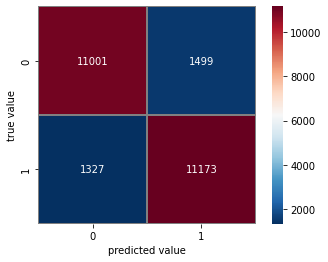

Final Accuracy: 0.88696
report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [12]:
c025_model = LogisticRegression(C=0.25)

c025_model.fit(X_train, y_train)
print("LogisticRegression(C=0.25)")
print ("Train Accuracy:", accuracy_score(y_val, c025_model.predict(X_val)))

c025_model.fit(X, target)
mat = confusion_matrix(target, c025_model.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("Final Accuracy: %s" 
       % accuracy_score(target, c025_model.predict(X_test)))
print("report:\n", classification_report(target, c025_model.predict(X_test)))

LogisticRegression(C=0.5)
Train Accuracy: 0.88432


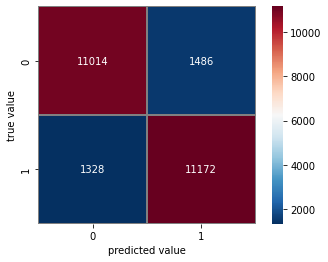

Final Accuracy: 0.88744
report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [13]:
c05_model = LogisticRegression(C=0.5)

c05_model.fit(X_train, y_train)
print("LogisticRegression(C=0.5)")
print ("Train Accuracy:", accuracy_score(y_val, c05_model.predict(X_val)))

c05_model.fit(X, target)
mat = confusion_matrix(target, c05_model.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("Final Accuracy: %s" 
       % accuracy_score(target, c05_model.predict(X_test)))
print("report:\n", classification_report(target, c05_model.predict(X_test)))

LogisticRegression(C=1)
Train Accuracy: 0.88464


C:\Users\Timo\.conda\envs\ml\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


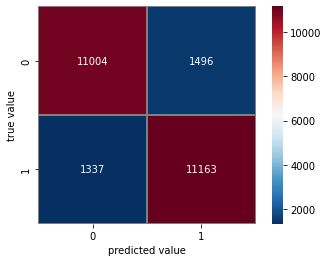

Final Accuracy: 0.88668
report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [24]:
c1_model = LogisticRegression(C=1)

c1_model.fit(X_train, y_train)
print("LogisticRegression(C=1)")
print ("Train Accuracy:", accuracy_score(y_val, c1_model.predict(X_val)))

c1_model.fit(X, target)
mat = confusion_matrix(target, c1_model.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("Final Accuracy: %s" 
       % accuracy_score(target, c1_model.predict(X_test)))
print("report:\n", classification_report(target, c1_model.predict(X_test)))

In [15]:
'''
Lemmatization和Stemming之間做選擇。這兩者之間最主要的差別在於，
lemma會盡可能把恢復成字典上有的字，stemming則會把文字的後置 (suffix)整個切掉而不在意切掉後的字是不是字典上有的字。
在此選擇Lemmatization
'''

'\nLemmatization和Stemming之間做選擇。這兩者之間最主要的差別在於，\nlemma會盡可能把恢復成字典上有的字，stemming則會把文字的後置 (suffix)整個切掉而不在意切掉後的字是不是字典上有的字。\n在此選擇Lemmatization\n'

In [49]:
from wordcloud import WordCloud,STOPWORDS

feature_to_coef = {
    word: coef for word, coef in zip(
        cv.get_feature_names(), c05_model.coef_[0]
    )
}

#  5 most discriminating words for both positive and negative reviews

for best_positive in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1], 
    reverse=True)[:20]:
    print (best_positive)
    
print("\n")

for best_negative in sorted(
    feature_to_coef.items(), 
    key=lambda x: x[1])[:20]:
    print (best_negative)

('excellent', 1.3929334953808152)
('perfect', 1.2163553077536546)
('wonderful', 0.9989346579700061)
('amazing', 0.9853813251005838)
('superb', 0.9469934738889548)
('must see', 0.9300156279228352)
('great', 0.8966133865472193)
('favorite', 0.8949378383015916)
('enjoyable', 0.8719906157187179)
('rare', 0.856537471185116)
('funniest', 0.822356843537079)
('enjoyed', 0.8142623089784483)
('wonderfully', 0.8134562801359972)
('loved', 0.7909982052852956)
('refreshing', 0.7835881125787469)
('well worth', 0.7749160901794733)
('fantastic', 0.7711389735977516)
('brilliant', 0.7651582471392587)
('today', 0.7576592830595064)
('perfectly', 0.7170414037750226)


('worst', -1.9340956473841393)
('awful', -1.5691554783458963)
('waste', -1.4686589042227094)
('boring', -1.372938100655589)
('disappointment', -1.3032397269505969)
('poorly', -1.264349726421096)
('dull', -1.1987959653762772)
('terrible', -1.1724955913401063)
('poor', -1.148806028229669)
('disappointing', -1.1454752847328185)
('bad', -1.0632593

Accuracy for C=0.001: 0.87824
Accuracy for C=0.005: 0.88384
Accuracy for C=0.01: 0.88496
Accuracy for C=0.05: 0.88352
Accuracy for C=0.1: 0.88336


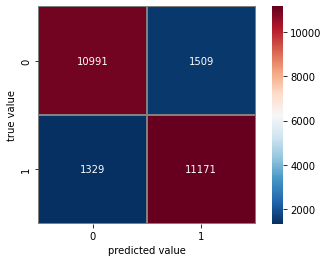

SVM Final Accuracy: 0.88648
report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89     12500
           1       0.88      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [27]:
# Algorithms
# Support Vector Machines (SVM)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

for c in [0.001, 0.005, 0.01, 0.05, 0.1]:
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_val, svm.predict(X_val))))

final_svm = LinearSVC(C=0.01)
final_svm.fit(X, target)
mat = confusion_matrix(target, final_svm.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("SVM Final Accuracy: %s" 
       % accuracy_score(target, final_svm.predict(X_test)))
print("report:\n", classification_report(target, final_svm.predict(X_test)))

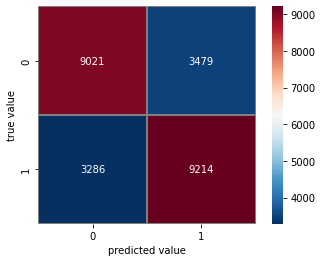

DecisionTree Final Accuracy: 0.7294
report:
               precision    recall  f1-score   support

           0       0.73      0.72      0.73     12500
           1       0.73      0.74      0.73     12500

    accuracy                           0.73     25000
   macro avg       0.73      0.73      0.73     25000
weighted avg       0.73      0.73      0.73     25000



In [28]:
from sklearn import tree

DecisionTree = tree.DecisionTreeClassifier()
DecisionTree.fit(X, target)
mat = confusion_matrix(target, DecisionTree.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r")  
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("DecisionTree Final Accuracy: %s" 
       % accuracy_score(target, DecisionTree.predict(X_test)))
print("report:\n", classification_report(target, DecisionTree.predict(X_test)))

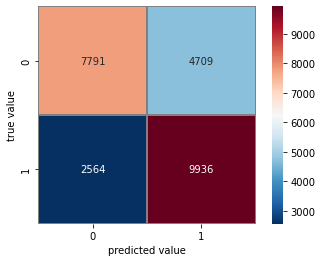

RandomForest Final Accuracy: 0.70908
report:
               precision    recall  f1-score   support

           0       0.75      0.62      0.68     12500
           1       0.68      0.79      0.73     12500

    accuracy                           0.71     25000
   macro avg       0.72      0.71      0.71     25000
weighted avg       0.72      0.71      0.71     25000



In [32]:
from sklearn.ensemble import RandomForestClassifier

RandomForest = RandomForestClassifier(max_depth=2, random_state=0)
RandomForest.fit(X, target)
mat = confusion_matrix(target, RandomForest.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("RandomForest Final Accuracy: %s" 
       % accuracy_score(target, RandomForest.predict(X_test)))
print("report:\n", classification_report(target, RandomForest.predict(X_test)))

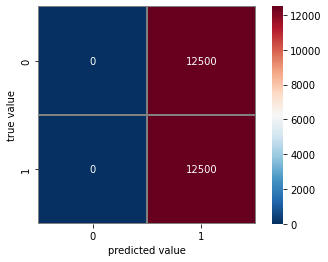

KNeighbors Final Accuracy: 0.5
report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     12500
           1       0.50      1.00      0.67     12500

    accuracy                           0.50     25000
   macro avg       0.25      0.50      0.33     25000
weighted avg       0.25      0.50      0.33     25000



C:\Users\Timo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Timo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Timo\.conda\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

k = 5   # 選擇 K 值
weights = 'uniform'  # 選擇權重：'uniform' 或 'distance'

KNeighbors = make_pipeline(StandardScaler(with_mean=False),KNeighborsClassifier(n_neighbors=k, weights=weights))
KNeighbors.fit(X, target)
mat = confusion_matrix(target, KNeighbors.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("KNeighbors Final Accuracy: %s" 
       % accuracy_score(target, KNeighbors.predict(X_test)))
print("report:\n", classification_report(target, KNeighbors.predict(X_test)))

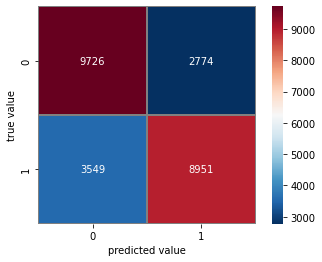

SGD Final Accuracy: 0.74708
report:
               precision    recall  f1-score   support

           0       0.73      0.78      0.75     12500
           1       0.76      0.72      0.74     12500

    accuracy                           0.75     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.75      0.75      0.75     25000



In [31]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


k = 5   # 選擇 K 值
weights = 'uniform'  # 選擇權重：'uniform' 或 'distance'

SGD = make_pipeline(StandardScaler(with_mean=False),SGDClassifier(max_iter=1000, tol=1e-3))
SGD.fit(X, target)
mat = confusion_matrix(target, SGD.predict(X_test))
sns.heatmap(mat,square= True, annot=True, cbar= True, fmt="d", linewidths=0.3,linecolor="grey", cmap="RdBu_r") 
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()
print ("SGD Final Accuracy: %s" 
       % accuracy_score(target, SGD.predict(X_test)))
print("report:\n", classification_report(target, SGD.predict(X_test)))